# Definição da Metodologia - Artigo 1 - Reconhecimento de Padrões

Bernardo Bacha de Resende

## Minha abordagem para resolver o problema

Minha abordagem para tentar resolver um problema com um enunciado aberto como este foi baseada em investigação empírica orientada por análise geométrica e observação. A principal ideia foi:

> Encontrar uma métrica ou parâmetro calculado a partir da projeção Q₁ × Q₂, que pudesse ser otimizado para encontrar valores adequados de `k` e `h`, sem a necessidade de realizar múltiplos treinamentos e validações (grid search), como tradicionalmente é feito no KNN.

Para isso, defini o seguinte processo experimental:

1. **Base de referência**: escolhi o dataset do câncer de mama como base para experimentação.  
2. **Grid Search inicial**: realizei um grid search tradicional para várias combinações de `k` e `h`, registrando as acurácias correspondentes. Isso serviu como **referência de desempenho real**.
3. **Geração de métricas candidatas**: a partir daí, o objetivo foi gerar ideias de métricas que pudessem ser calculadas **apenas a partir das projeções Q₁ e Q₂ das amostras**, e que pudessem indicar boa separação entre as classes.  
   Para isso, contei com ferramentas como o ChatGPT para explorar diferentes abordagens — geométricas, informacionais, topológicas, estatísticas, físicas e até inspiradas em análise vetorial.  
   No total, testei mais de **30 métricas diferentes**.
4. **Avaliação das métricas**: para cada métrica, analisei sua **relação com a acurácia real**. O critério foi:
   - Se a métrica mostrasse **comportamento aleatório** em relação à acurácia, ela era descartada.
   - Se houvesse uma **tendência clara** (por exemplo, ao **maximizar ou minimizar** a métrica, a acurácia também aumentava), a métrica era considerada útil.
5. **Preferência por simplicidade**: além da correlação com a acurácia, também dei preferência a métricas:
   - Simples de calcular
   - De fácil interpretação
   - Possíveis de serem otimizadas diretamente

Esse processo me permitiu **selecionar e justificar** uma métrica final, que será utilizada como função objetivo para guiar a escolha dos hiperparâmetros `k` e `h` no modelo KNN ponderado.


Por uma questão de praticidade e organização, optei por não incluir neste documento todo o código utilizado para testar as mais de 30 métricas consideradas, pois o volume seria excessivo e pouco útil para a apresentação da metodologia. Em vez disso, exportei a tabela final com os resultados dos testes e a importei abaixo para exibir os principais resultados e gráficos correspondentes.


### Explicação das métricas testadas

**comprimento_fronteira_logreg_q1_q2**  
Mede o comprimento estimado da fronteira de decisão criada por uma regressão logística no plano Q₁ × Q₂. Quanto menor o comprimento, mais simples e suave é a separação entre as classes.

**distancia_media_signed_q1_q2**  
Calcula a distância média com sinal dos pontos até a reta Q₁ = Q₂. Pontos acima da reta têm distância positiva, abaixo negativa. A média indica o viés geral do modelo.

**desvio_projecao_centroide_q1_q2**  
Projeta os pontos no vetor que liga os centróides das classes e mede o desvio padrão das projeções. Quanto menor o desvio, mais alinhados estão os pontos com a direção da separação.

**distancia_centroides_q1_q2**  
Calcula a distância euclidiana entre os centróides das classes 1 e -1 no espaço Q₁ × Q₂. Representa o quanto as classes estão separadas globalmente.

**distancia_centros_gravitacionais_q1_q2**  
Versão ponderada da distância entre centróides: os pontos mais próximos do centro do plano têm maior peso. Mede a separação considerando "força gravitacional".

**diferenca_skew_q1_q2**  
Mede a diferença entre as assimetrias (skewness) das distribuições de Q₁ - Q₂ para cada classe. Reflete se uma das classes está mais "esticada" para um lado.

**dominancia_media_anular_q1_q2**  
Divide o plano em anéis concêntricos e mede, em cada um, a diferença de proporção entre classes. A média dessas dominâncias mostra se há organização radial.

**indice_silhueta_q1_q2**  
Mede a separação entre as classes com base na distância intra e interclasse. Varia entre -1 e 1, sendo valores altos melhores.

**angulo_vetores_classes_q1_q2**  
Calcula o ângulo entre os vetores médios das classes. Quanto menor o ângulo, mais paralelas e bem orientadas estão as classes no espaço.

**diferenca_inclinacao_media_q1_q2**  
Calcula a diferença de inclinação média (arctan2) dos vetores de cada classe em relação à origem. Indica se as classes ocupam regiões em direções diferentes.

**mutual_information_q1_q2_y**  
Calcula a informação mútua entre as projeções Q₁, Q₂ e os rótulos. Mede o quanto saber Q₁ e Q₂ ajuda a prever a classe.

**variancia_pca_q1_q2**  
Aplica PCA nas projeções e mede a variância explicada pelo primeiro componente. Espaços mais comprimíveis (mais lineares) têm valores maiores.

**media_cosseno_direcao_separacao_q1_q2**  
Para cada ponto, calcula o cosseno do ângulo entre ele e o vetor de separação entre centróides. Mede alinhamento geral com a direção de separação.

**acuracia_logreg_q1_q2**  
Treina uma regressão logística no plano Q₁ × Q₂ e mede sua acurácia. Representa a separabilidade linear prática do espaço.

**lda_separabilidade_q1_q2**  
Calcula uma versão do score da LDA: variância entre classes dividida pela soma das variâncias intra-classe. Mede separabilidade linear teórica.

**curvatura_fronteira_q1_q2**  
A partir de uma regressão logística, estima a curvatura da fronteira de decisão contando mudanças de classe em uma malha (grid). Fronteiras simples têm baixa curvatura.

**indice_fisher_q1_q2**  
Mesmo princípio do LDA: distância ao quadrado entre centróides dividida pelas variâncias intra-classe. Mede separabilidade teórica simples.

**q1_eq_q2_proximos**  
Proporção de pontos muito próximos da reta Q₁ = Q₂, que representa a fronteira de decisão. Proporção alta indica baixa margem.

**energia_repulsao_entre_classes_q1_q2**  
Trata cada ponto como uma carga elétrica. Soma as interações entre pontos de classes opostas (1/d). Energia alta indica proximidade perigosa entre classes.

**proporcao_baixa_margem_q1_q2**  
Proporção de pontos cuja margem (|Q₁ - Q₂|) é muito pequena. Valores altos indicam muitas classificações indecisas.

**mudancas_classe_orbita_q1_q2**  
Simula uma órbita circular ao redor da origem no plano Q₁ × Q₂ e conta quantas vezes a classe dominante muda ao longo do percurso.

**mudancas_angulo_classe_q1_q2**  
Divide o plano Q₁ × Q₂ em setores angulares (como uma pizza) e mede quantas vezes a classe dominante muda de setor para setor.

**mudancas_classe_espiral_q1_q2**  
Gira uma espiral crescente ao redor do centro e conta as mudanças de classe ao longo dela. Indica estrutura espiral de separação ou mistura caótica.

**reversoes_fluxo_direcional_q1_q2**  
Divide o plano em uma malha e calcula a direção da classe dominante em cada célula. Conta quantas vezes a direção muda entre células vizinhas na horizontal.

**n_componentes_conexos_q1_q2**  
Calcula quantos grupos conectados existem em cada classe, com base na conectividade entre vizinhos. Muitas componentes indicam fragmentação espacial.

**entropia_condicional_q1_q2**  
Divide o plano em blocos e mede a entropia da classe em cada bloco. A entropia condicional mostra o quão confusas são as regiões locais.

**entropia_q1_q2**  
Calcula a entropia ponto a ponto com base nas proporções Q₁ / (Q₁ + Q₂). Mede a confiança da decisão para cada ponto.

**score_entropia_mais_inverso_angulo**  
Combina a entropia da decisão com o inverso do ângulo entre os vetores das classes. Tenta balancear separação informacional com orientação geométrica.

**desequilibrio_quadrantes_q1_q2**  
Divide o plano Q₁ × Q₂ em 4 quadrantes e mede quantas vezes a classe dominante muda entre eles. Representa alternância de regiões próximas.

**razao_intra_interclasse_q1_q2**  
Calcula a razão entre a distância média intra-classe e a distância entre centróides. Valores menores indicam grupos bem separados e compactos.



In [15]:
import pandas as pd
df_resultados = pd.read_csv('data/df_resultados.csv')
df_resultados.corr()['acuracia'].iloc[3:].sort_values(ascending=True)

comprimento_fronteira_logreg_q1_q2       -0.948686
distancia_media_signed_q1_q2             -0.937271
desvio_projecao_centroide_q1_q2          -0.936981
distancia_centroides_q1_q2               -0.936949
distancia_centros_gravitacionais_q1_q2   -0.936897
diferenca_skew_q1_q2                     -0.919673
dominancia_media_anular_q1_q2            -0.731169
indice_silhueta_q1_q2                    -0.636417
angulo_vetores_classes_q1_q2             -0.611243
diferenca_inclinacao_media_q1_q2         -0.595356
mutual_information_q1_q2_y               -0.587313
variancia_pca_q1_q2                      -0.537873
media_cosseno_direcao_separacao_q1_q2    -0.392513
acuracia_logreg_q1_q2                    -0.315614
lda_separabilidade_q1_q2                 -0.108831
curvatura_fronteira_q1_q2                 0.005027
indice_fisher_q1_q2                       0.006950
q1_eq_q2_proximos                         0.124008
energia_repulsao_entre_classes_q1_q2      0.128620
proporcao_baixa_margem_q1_q2   

Durante a geração e análise das métricas, notei que muitas delas, apesar de partirem de lógicas, inspirações ou campos de aplicação completamente diferentes, acabaram produzindo gráficos com distribuições muito semelhantes em relação à acurácia. Por esse motivo, optei por ordenar os plots com base na correlação de cada métrica com a variável `acurácia`, de forma a agrupar visualmente métricas com comportamentos similares.


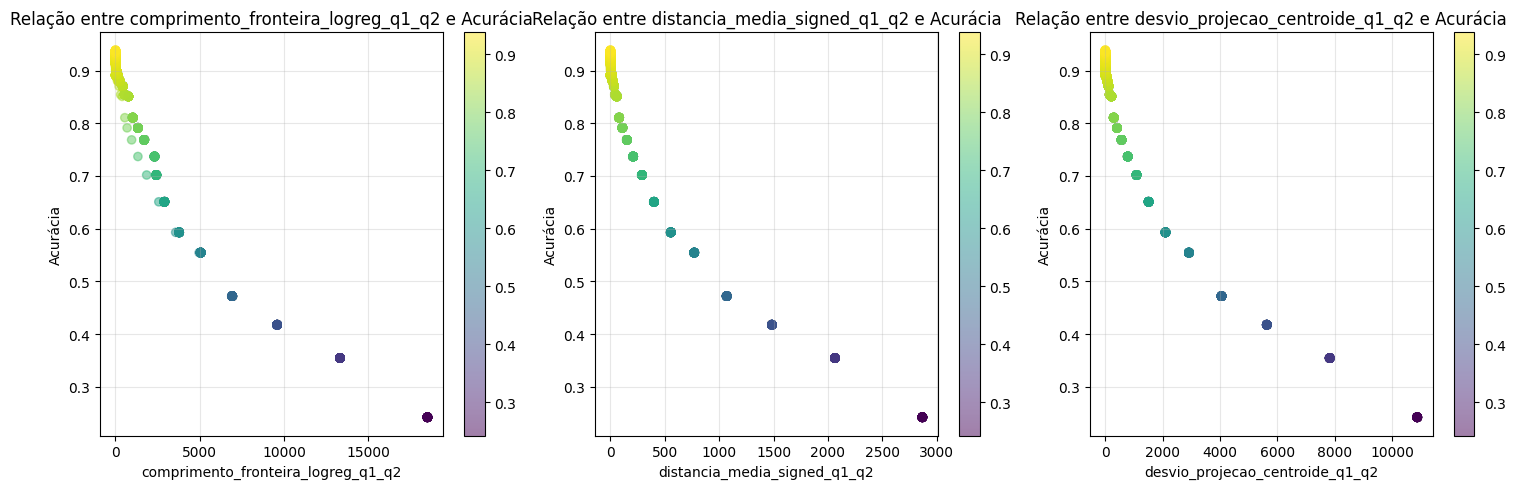

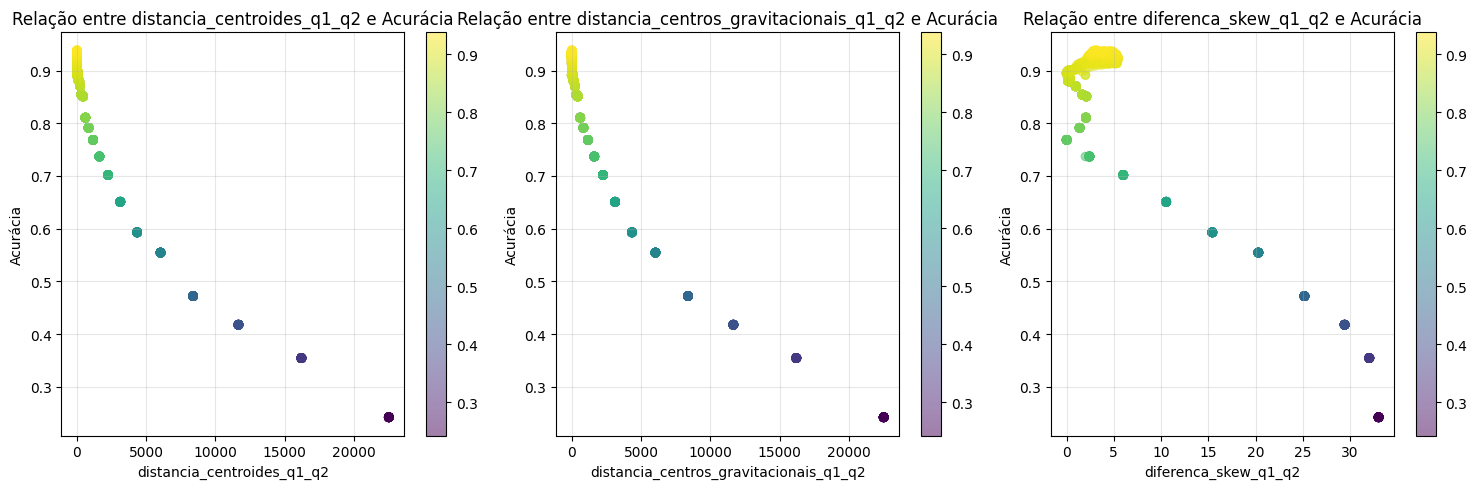

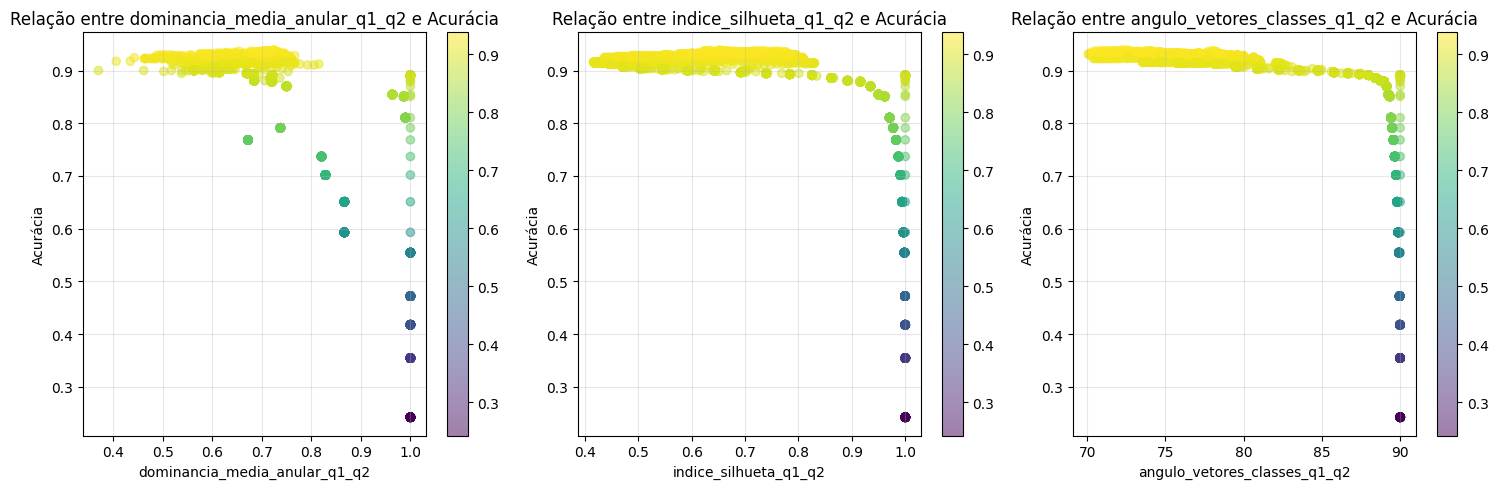

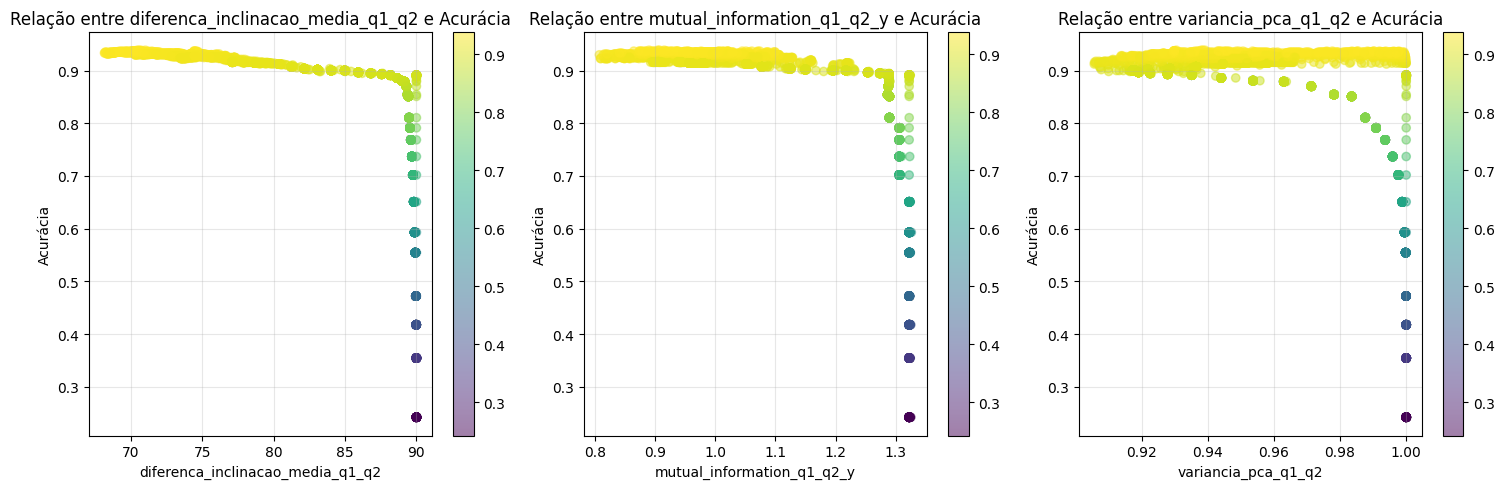

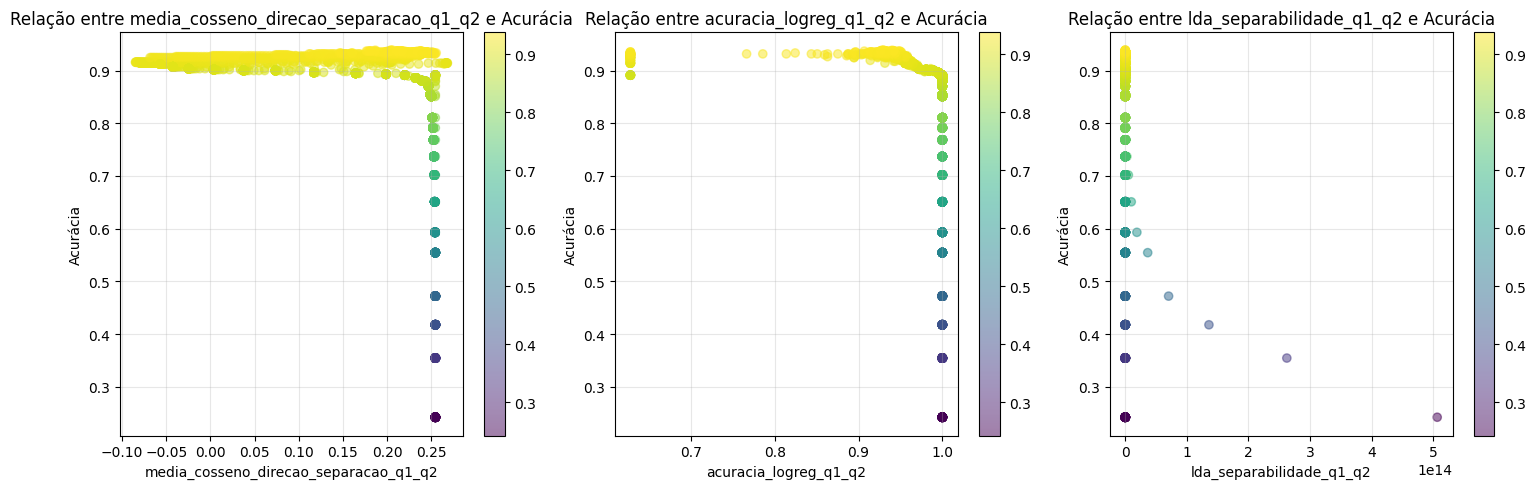

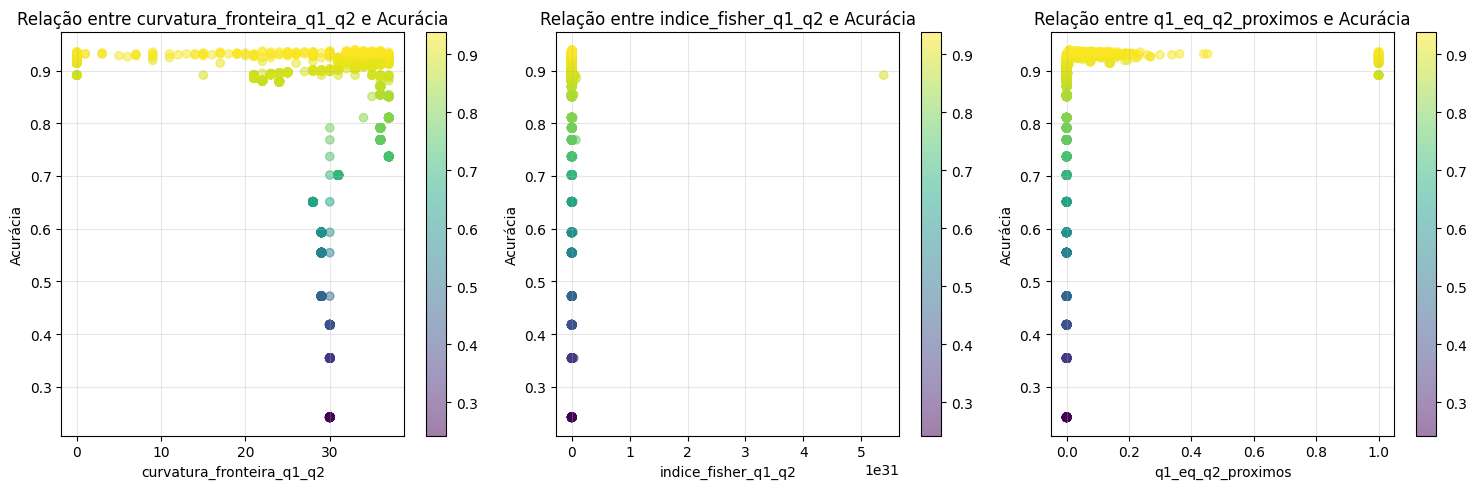

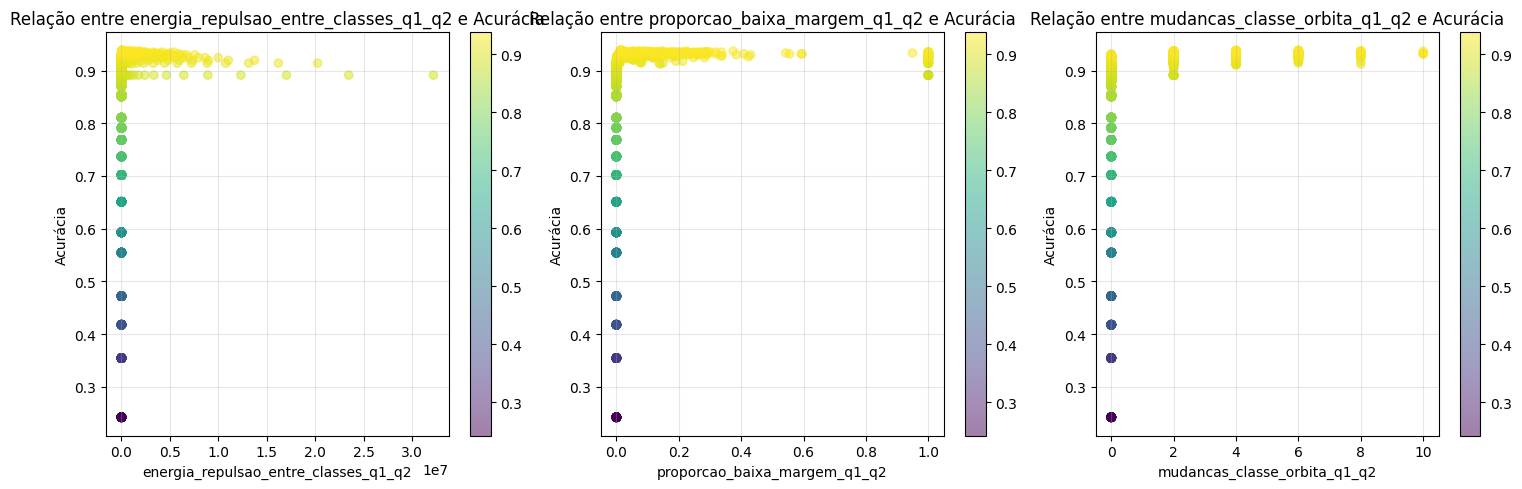

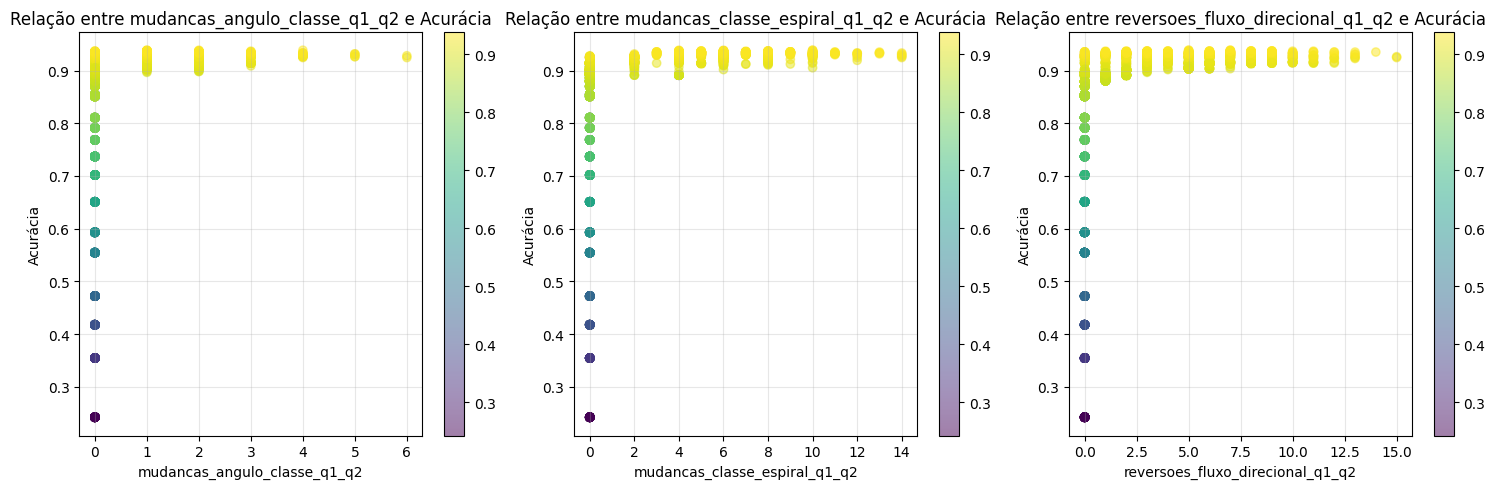

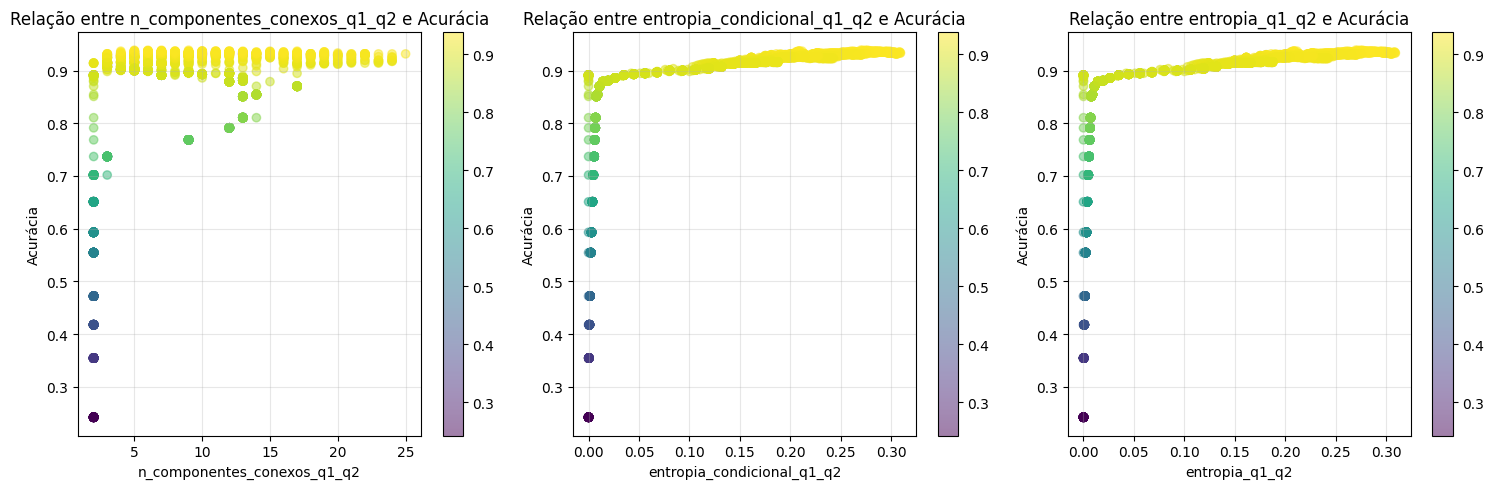

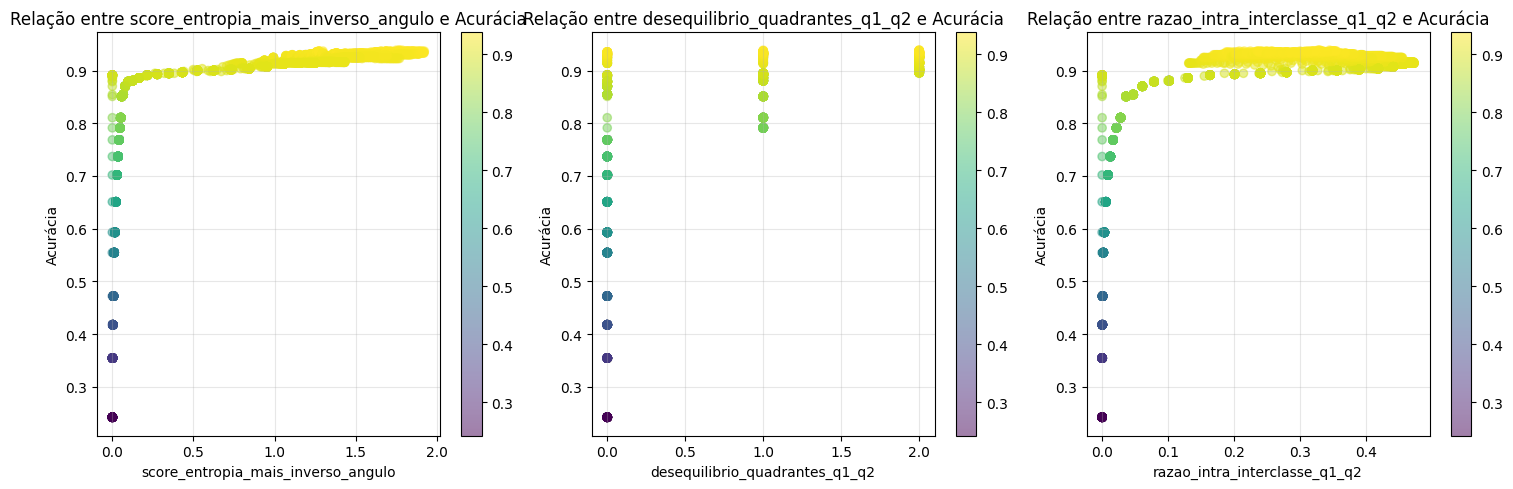

In [ ]:
import matplotlib.pyplot as plt

# Pegando as colunas ordenadas por correlação
colunas_ordenadas = df_resultados.corr()['acuracia'].iloc[3:].sort_values(ascending=True).index

# Calculando quantos grupos de 3 precisaremos
n_colunas = len(colunas_ordenadas)
n_grupos = (n_colunas + 2) // 3  # Arredonda para cima

# Iterando por grupos de 3 colunas
for grupo in range(n_grupos):
    # Pegando as 3 colunas do grupo atual
    colunas_grupo = colunas_ordenadas[grupo*3:grupo*3 + 3]
    
    # Criando uma nova figura para cada grupo
    plt.figure(figsize=(15, 5))
    
    # Plotando os gráficos do grupo atual
    for i, coluna in enumerate(colunas_grupo):
        plt.subplot(1, 3, i+1)
        
        scatter = plt.scatter(df_resultados[coluna], 
                            df_resultados['acuracia'],
                            c=df_resultados['acuracia'],
                            alpha=0.5,
                            cmap='viridis')
        
        plt.xlabel(coluna)
        plt.ylabel('Acurácia')
        plt.grid(True, alpha=0.3)
        plt.colorbar(scatter)
        plt.title(f'Relação entre {coluna} e Acurácia')
    
    plt.tight_layout()
    plt.show()

## Escolha da métrica final

Visto isso, a métrica escolhida foi a **distância entre centróides** no espaço Q₁ × Q₂. Essa métrica apresentou uma das maiores correlações com a acurácia, além de ser simples tanto conceitualmente quanto em termos computacionais.

A ideia por trás dessa métrica é medir a separação global entre as classes, considerando a distância euclidiana entre os centros de massa (centróides) das amostras de cada classe projetadas no plano Q₁ × Q₂.

### Formulação matemática

Sejam $C_1$ e $C_{-1}$ os conjuntos de pontos projetados no espaço Q₁ × Q₂ pertencentes às classes +1 e -1, respectivamente.

A distância entre os centróides é dada por:

$$
D = \left\| \mu_1 - \mu_{-1} \right\|
$$

Onde:

- $\mu_1 = \frac{1}{|C_1|} \sum_{x \in C_1} x$ é o centróide da classe +1  
- $\mu_{-1} = \frac{1}{|C_{-1}|} \sum_{x \in C_{-1}} x$ é o centróide da classe -1  
- $\| \cdot \|$ denota a norma Euclidiana

Essa métrica pode ser utilizada como uma **função objetivo** para selecionar os hiperparâmetros `k` e `h` de forma totalmente não supervisionada (sem precisar de validação com acurácia real).


## Próximos passos

A partir da definição da métrica de distância entre centróides como critério de separação, os próximos passos do trabalho serão os seguintes:

- **Testar o método em diferentes conjuntos de dados**: o objetivo é avaliar a robustez da métrica em outros cenários além do dataset do câncer de mama. Serão utilizados tanto datasets reais (conhecidos na literatura para problemas de classificação binária) quanto **datasets sintéticos**, que permitirão criar situações específicas para estressar o comportamento da métrica.

- **Comparar os resultados com o grid search tradicional**: para cada dataset, será feita uma comparação direta entre os valores de `k` e `h` sugeridos pela otimização da métrica e os valores obtidos via grid search com validação cruzada supervisionada. Isso permitirá avaliar se a métrica de distância entre centróides é uma boa proxy para a acurácia real.

- **Explorar possíveis melhorias da métrica**: será investigada a possibilidade de combinar a distância entre centróides com outras métricas que foram testadas e apresentaram correlação parcial com a acurácia, ou incorporar ideias complementares que capturem aspectos locais ou direcionais da separação no plano Q₁ × Q₂.

Esses passos têm como objetivo consolidar o uso da métrica como uma alternativa eficiente, não supervisionada e generalizável para a seleção de hiperparâmetros no KNN ponderado.
